In [11]:
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt

In [13]:
# Загрузка данных
diabetes = datasets.load_diabetes(as_frame=True)
X = diabetes.data[['bmi']] # Используем признак "индекс массы тела" (BMI)
y = diabetes.target # Целевая переменная

In [15]:
np.random.seed(42)
indices = np.random.permutation(len(X))
train_size = int(0.8 * len(X))

# Используем .iloc для доступа к строкам по позиционным индексам
X_train, y_train = X.iloc[indices[:train_size]], y.iloc[indices[:train_size]]
X_test, y_test = X.iloc[indices[train_size:]], y.iloc[indices[train_size:]]

# Преобразуем DataFrame и Series в numpy массивы для дальнейших вычислений
X_train = X_train.values.flatten()
X_test = X_test.values.flatten()
y_train = y_train.values
y_test = y_test.values

In [17]:
# Реализация модели линейной регрессии
class LinearRegression:
    def __init__(self):
        self.w0 = None  # Смещение
        self.w1 = None  # Коэффициент

    def fit(self, X, y):
        X_mean = np.mean(X)
        y_mean = np.mean(y)
        numerator = np.sum((X - X_mean) * (y - y_mean))
        denominator = np.sum((X - X_mean) ** 2)
        self.w1 = numerator / denominator
        self.w0 = y_mean - self.w1 * X_mean

    def predict(self, X):
        return self.w0 + self.w1 * X

In [19]:
# Обучение модели
model = LinearRegression()
model.fit(X_train, y_train)

In [21]:
# Предсказания и оценка
y_pred = model.predict(X_test)

def mse(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

def r2_score(y_true, y_pred):
    ss_total = np.sum((y_true - np.mean(y_true)) ** 2)
    ss_res = np.sum((y_true - y_pred) ** 2)
    return 1 - (ss_res / ss_total)

print(f"MSE: {mse(y_test, y_pred):.2f}")
print(f"R²: {r2_score(y_test, y_pred):.2f}")


MSE: 3870.99
R²: 0.30


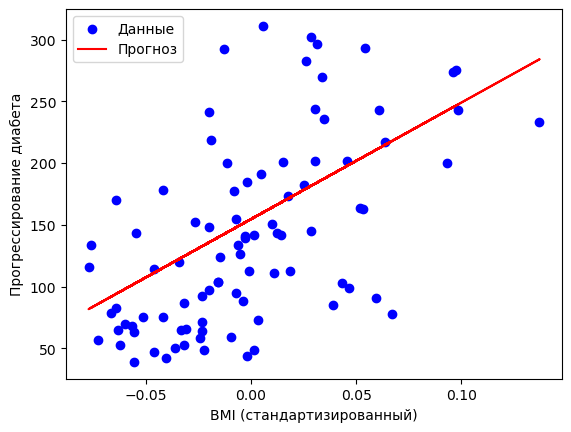

In [23]:
# Визуализация
plt.scatter(X_test, y_test, color='blue', label='Данные')
plt.plot(X_test, y_pred, color='red', label='Прогноз')
plt.xlabel('BMI (стандартизированный)')
plt.ylabel('Прогрессирование диабета')
plt.legend()
plt.show()